## Import statements

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import ttest_ind

In [3]:
df = pd.read_csv('../dataset/PhiUSIIL_Phishing_URL_Dataset.csv')

# Label 1 corresponds to a legitimate URL, label 0 to a phishing URL

In [4]:
df.head()
df.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516,0.571895
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430,0.494805
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000,1.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [5]:
# Check for missing values
print("Missing values per column:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

print(f"\nTotal missing values: {df.isnull().sum().sum()}")
print(f"Percentage of missing values: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100:.2f}%")



Missing values per column:
Series([], dtype: int64)

Total missing values: 0
Percentage of missing values: 0.00%


In [6]:
# Exploratory Data Analysis - Visualizations
# Separate numerical and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical columns ({len(numeric_cols)}): {numeric_cols}")
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")

Numerical columns (51): ['URLLength', 'DomainLength', 'IsDomainIP', 'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength', 'HasTitle', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'label']
Categorical columns (5): ['FILENAME', 'URL', 'Domain', 'TLD', 'Title']


In [7]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")

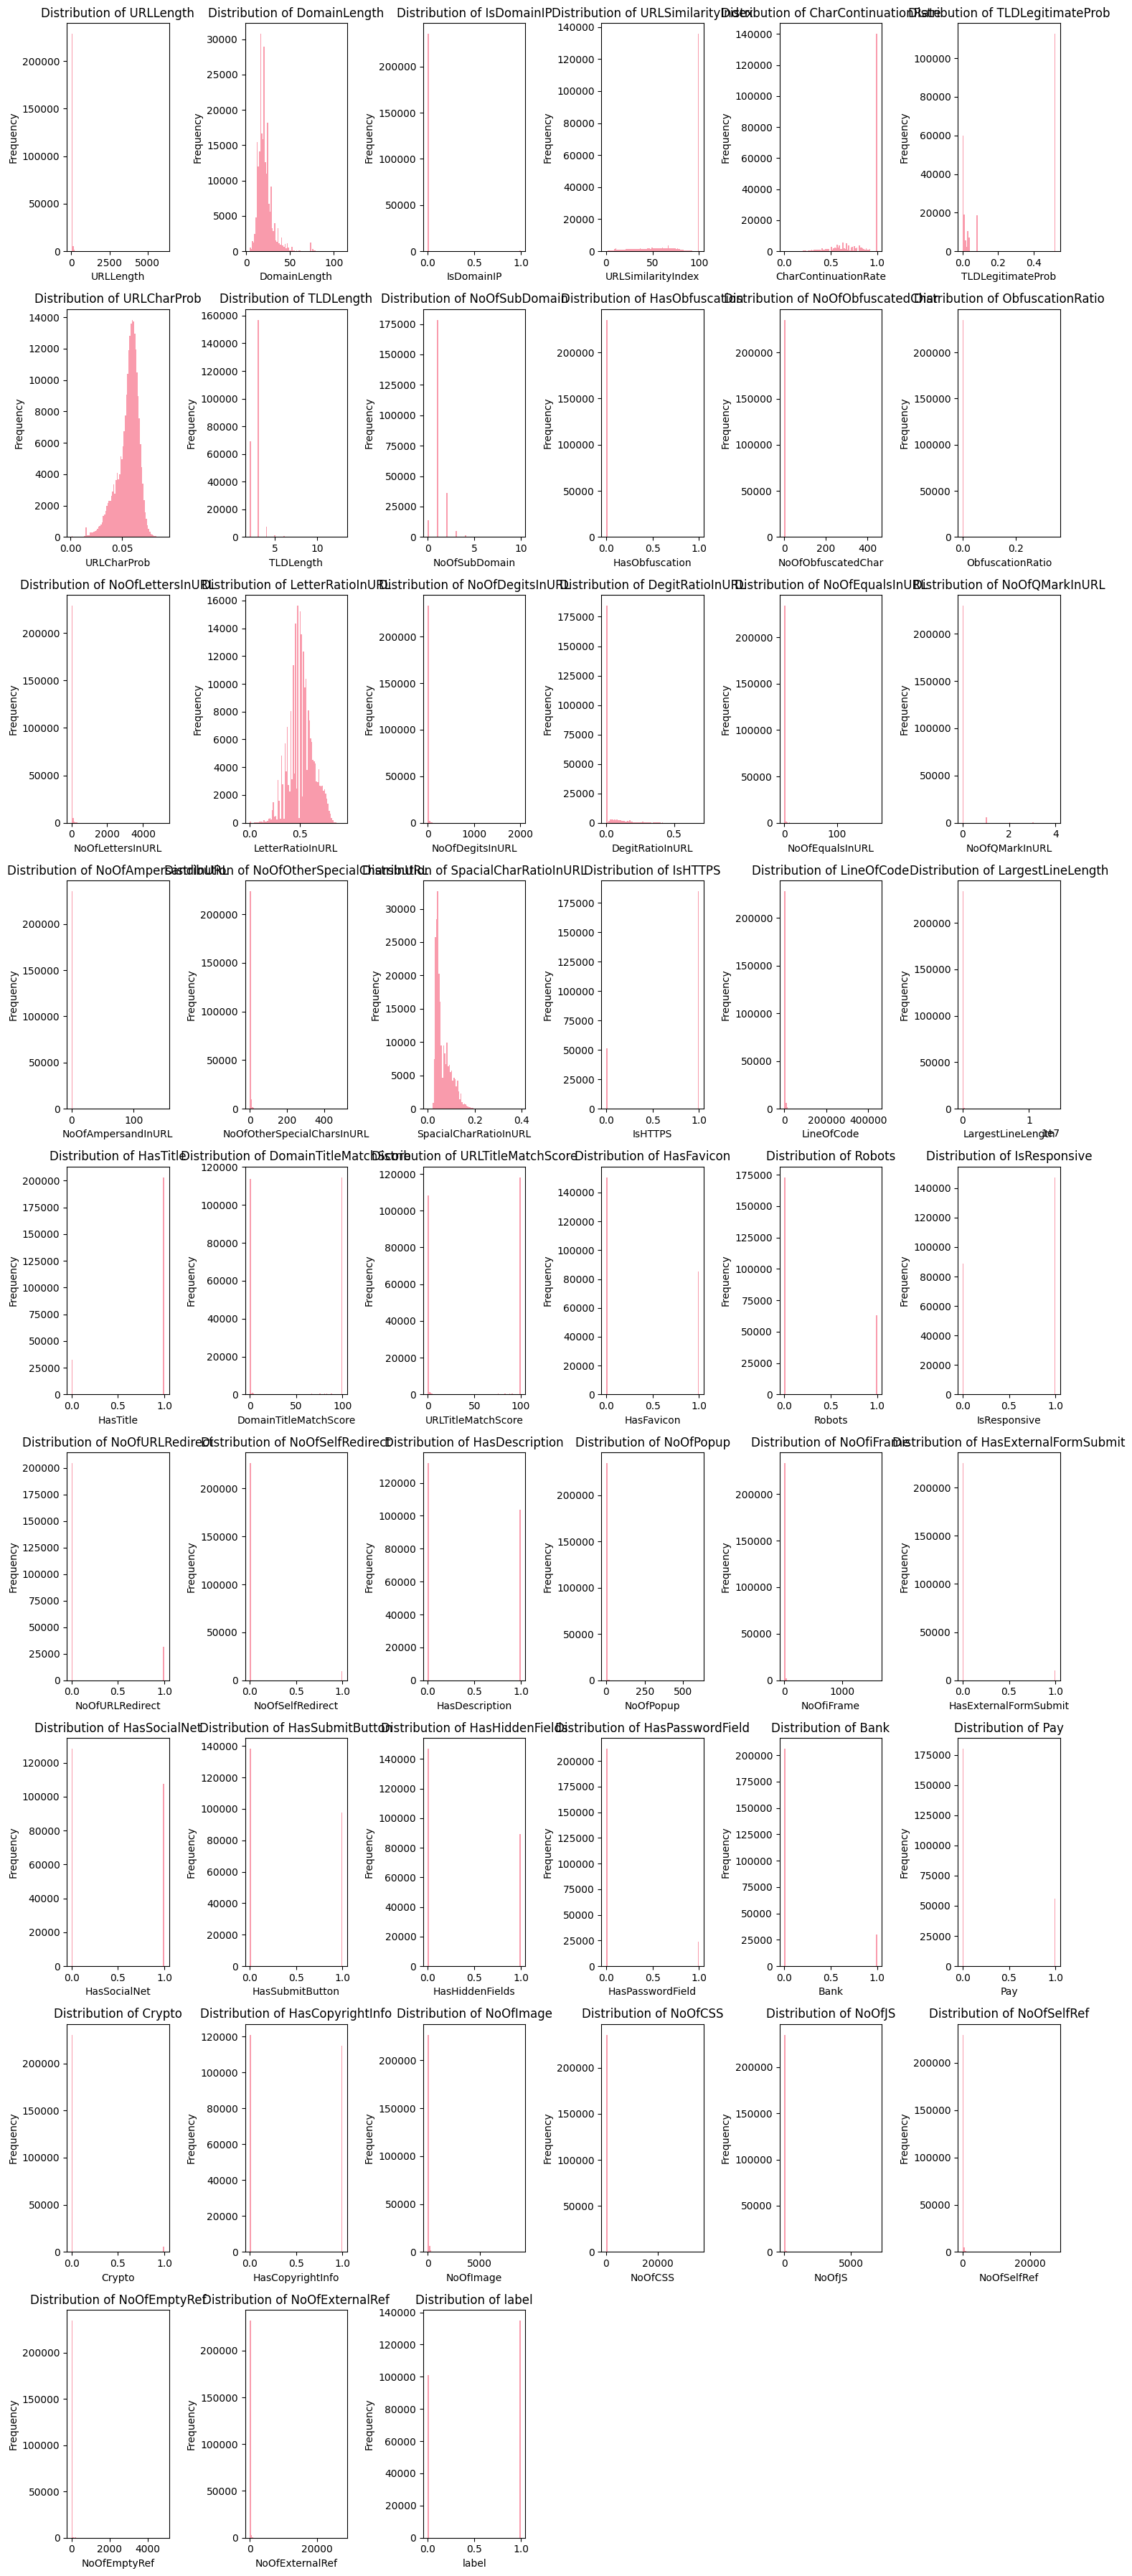

In [12]:
# Plot distributions of numerical features
if len(numeric_cols) > 0:
    n_cols = min(6, len(numeric_cols))
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

    for i, col in enumerate(numeric_cols): 
        if i < len(axes):
            axes[i].hist(df[col].dropna(), bins=80, alpha=0.7)
            axes[i].set_title(f'Distribution of {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frequency')
    
    # Hide empty subplots
    for i in range(len(numeric_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns found for histogram plots.")

In [14]:
# Split numerical columns into binary and non-binary
binary_cols = []
non_binary_cols = []

for col in numeric_cols:
    unique_values = df[col].dropna().unique()
    if len(unique_values) == 2 and set(unique_values).issubset({0, 1}):
        binary_cols.append(col)
    else:
        non_binary_cols.append(col)

print(f"Binary columns ({len(binary_cols)}): {binary_cols}")
print(f"Non-binary numerical columns ({len(non_binary_cols)}): {non_binary_cols}")# Plot distributions for non-binary numerical features only


Binary columns (20): ['IsDomainIP', 'HasObfuscation', 'IsHTTPS', 'HasTitle', 'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription', 'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo', 'label']
Non-binary numerical columns (31): ['URLLength', 'DomainLength', 'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'LineOfCode', 'LargestLineLength', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'NoOfPopup', 'NoOfiFrame', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef']


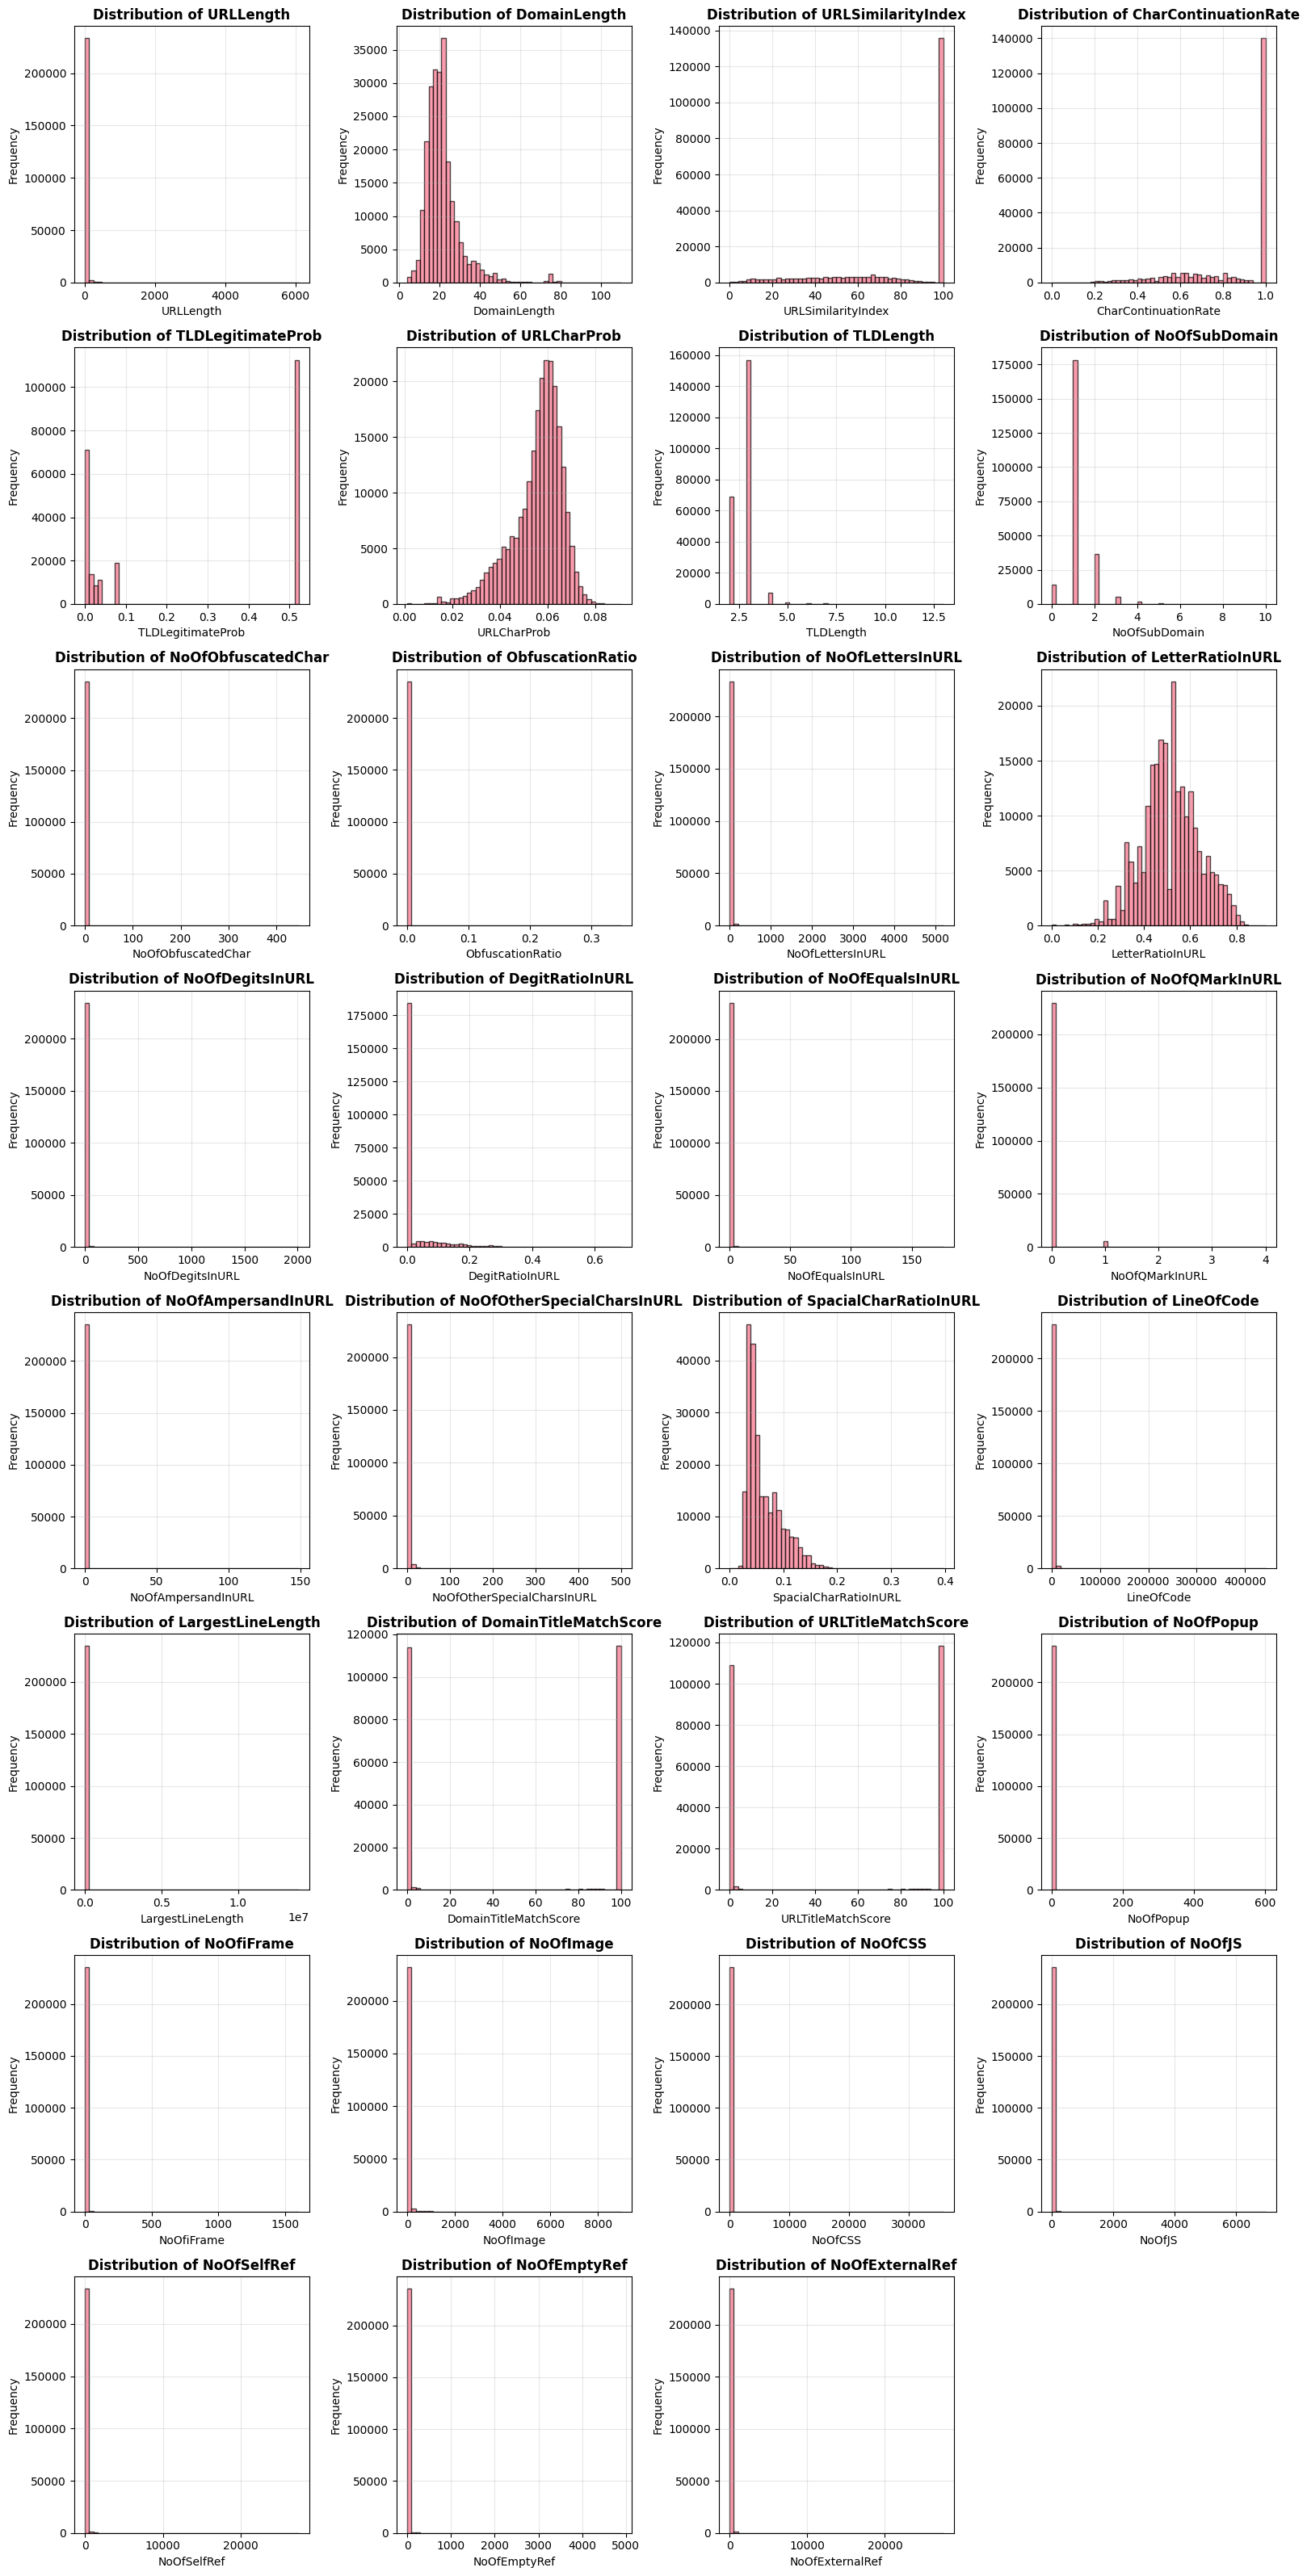

In [15]:

if len(non_binary_cols) > 0:
    n_cols = min(4, len(non_binary_cols))
    n_rows = (len(non_binary_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
    if n_rows == 1 and n_cols == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes
    else:
        axes = axes.flatten()

    for i, col in enumerate(non_binary_cols): 
        if i < len(axes):
            axes[i].hist(df[col].dropna(), bins=50, alpha=0.7, edgecolor='black')
            axes[i].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frequency')
            axes[i].grid(True, alpha=0.3)
    
    # Hide empty subplots
    for i in range(len(non_binary_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print("No non-binary numerical columns found for histogram plots.")

From the graphs, we can tell that we will need to set caps / log transform some of the non binary columns, as many of them are highly skewed. 

We can also observe that some of the variables are binary. Thus, we cannot simply log transform them. 

BINARY VARIABLES ANALYSIS


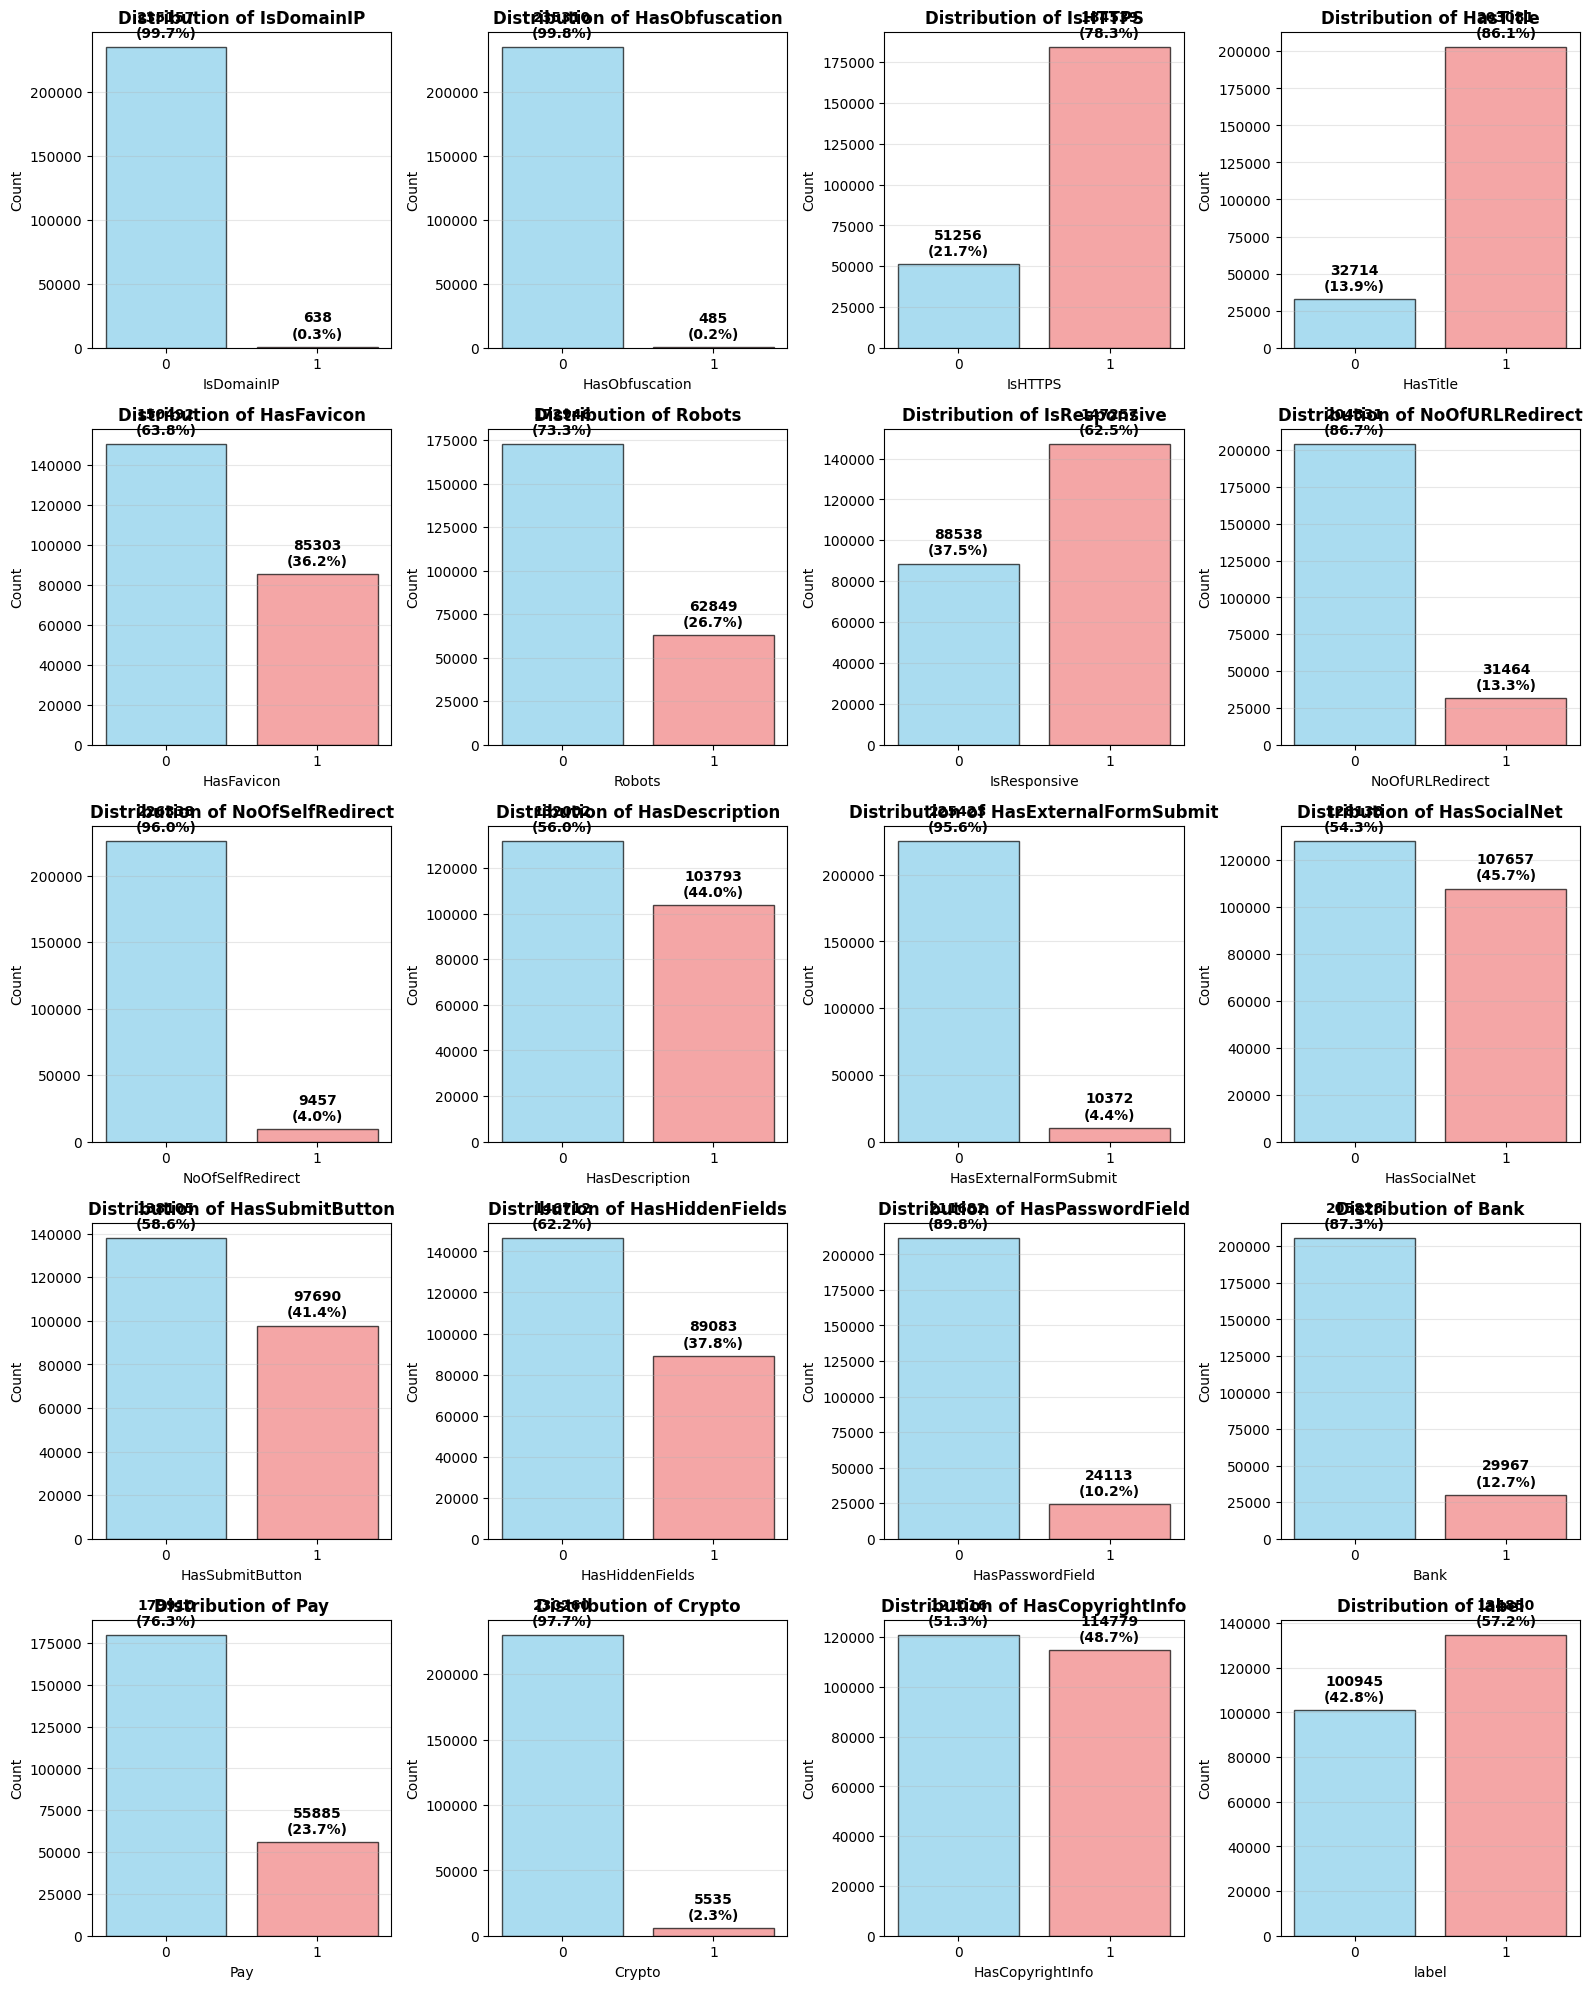


Binary Variables Summary:
             Variable  Count_0  Count_1 Percentage_0 Percentage_1  Total  Missing
           IsDomainIP   235157      638        99.7%         0.3% 235795        0
       HasObfuscation   235310      485        99.8%         0.2% 235795        0
              IsHTTPS    51256   184539        21.7%        78.3% 235795        0
             HasTitle    32714   203081        13.9%        86.1% 235795        0
           HasFavicon   150492    85303        63.8%        36.2% 235795        0
               Robots   172946    62849        73.3%        26.7% 235795        0
         IsResponsive    88538   147257        37.5%        62.5% 235795        0
      NoOfURLRedirect   204331    31464        86.7%        13.3% 235795        0
     NoOfSelfRedirect   226338     9457        96.0%         4.0% 235795        0
       HasDescription   132002   103793        56.0%        44.0% 235795        0
HasExternalFormSubmit   225423    10372        95.6%         4.4% 23579

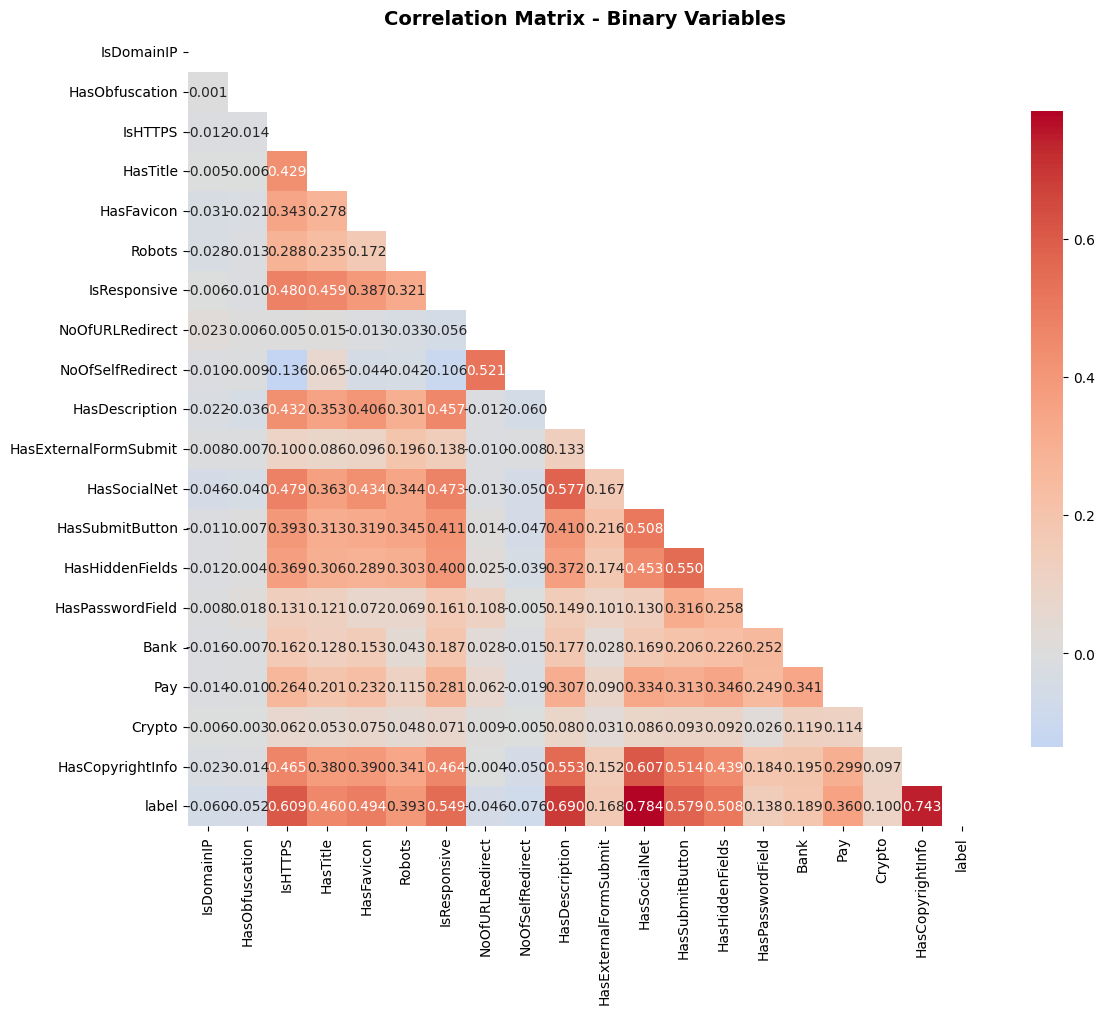


Highly Correlated Binary Variable Pairs (|correlation| > 0.5):
      Variable_1       Variable_2 Correlation
         IsHTTPS            label       0.609
    IsResponsive            label       0.549
 NoOfURLRedirect NoOfSelfRedirect       0.521
  HasDescription     HasSocialNet       0.577
  HasDescription HasCopyrightInfo       0.553
  HasDescription            label       0.690
    HasSocialNet  HasSubmitButton       0.508
    HasSocialNet HasCopyrightInfo       0.607
    HasSocialNet            label       0.784
 HasSubmitButton  HasHiddenFields       0.550
 HasSubmitButton HasCopyrightInfo       0.514
 HasSubmitButton            label       0.579
 HasHiddenFields            label       0.508
HasCopyrightInfo            label       0.743


Chi-Square Tests for Independence with Target Variable 'label':
             Variable Chi2_Statistic  P_Value Significant
           IsDomainIP        852.261 0.000000         Yes
       HasObfuscation        646.897 0.000000         Yes
      

In [16]:
# EDA for Binary Variables
print("="*60)
print("BINARY VARIABLES ANALYSIS")
print("="*60)

if len(binary_cols) > 0:
    # 1. Visualize binary columns as bar plots
    n_cols = min(4, len(binary_cols))
    n_rows = (len(binary_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
    if n_rows == 1 and n_cols == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes
    else:
        axes = axes.flatten()

    for i, col in enumerate(binary_cols):
        if i < len(axes):
            value_counts = df[col].value_counts().sort_index()
            bars = axes[i].bar(value_counts.index, value_counts.values, 
                              alpha=0.7, edgecolor='black', color=['skyblue', 'lightcoral'])
            axes[i].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Count')
            axes[i].set_xticks([0, 1])
            axes[i].grid(True, alpha=0.3, axis='y')
            
            # Add count labels and percentages on bars
            total = sum(value_counts.values)
            for j, v in enumerate(value_counts.values):
                percentage = (v/total)*100
                axes[i].text(value_counts.index[j], v + max(value_counts.values)*0.02, 
                           f'{v}\n({percentage:.1f}%)', ha='center', va='bottom', fontweight='bold')
    
    # Hide empty subplots
    for i in range(len(binary_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # 2. Summary statistics table for binary variables
    print("\nBinary Variables Summary:")
    binary_summary = []
    for col in binary_cols:
        counts = df[col].value_counts().sort_index()
        total = len(df[col].dropna())
        zero_count = counts.get(0, 0)
        one_count = counts.get(1, 0)
        zero_pct = (zero_count/total)*100 if total > 0 else 0
        one_pct = (one_count/total)*100 if total > 0 else 0
        
        binary_summary.append({
            'Variable': col,
            'Count_0': zero_count,
            'Count_1': one_count,
            'Percentage_0': f"{zero_pct:.1f}%",
            'Percentage_1': f"{one_pct:.1f}%",
            'Total': total,
            'Missing': df[col].isnull().sum()
        })
    
    binary_df = pd.DataFrame(binary_summary)
    print(binary_df.to_string(index=False))
    
    # 3. Correlation matrix for binary variables
    if len(binary_cols) > 1:
        print(f"\n\nCorrelation Matrix for Binary Variables:")
        binary_corr = df[binary_cols].corr()
        
        plt.figure(figsize=(12, 10))
        mask = np.triu(np.ones_like(binary_corr, dtype=bool))
        sns.heatmap(binary_corr, mask=mask, annot=True, cmap='coolwarm', center=0,
                    square=True, fmt='.3f', cbar_kws={"shrink": .8})
        plt.title('Correlation Matrix - Binary Variables', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()
        
        # Find highly correlated pairs
        print("\nHighly Correlated Binary Variable Pairs (|correlation| > 0.5):")
        high_corr_pairs = []
        for i in range(len(binary_cols)):
            for j in range(i+1, len(binary_cols)):
                corr_value = binary_corr.iloc[i, j]
                if abs(corr_value) > 0.5:
                    high_corr_pairs.append({
                        'Variable_1': binary_cols[i],
                        'Variable_2': binary_cols[j],
                        'Correlation': f"{corr_value:.3f}"
                    })
        
        if high_corr_pairs:
            high_corr_df = pd.DataFrame(high_corr_pairs)
            print(high_corr_df.to_string(index=False))
        else:
            print("No highly correlated pairs found.")
    
    # 4. Chi-square test for independence (if target variable exists)
    target_col = None
    potential_targets = ['target', 'label', 'class', 'y']
    for col in potential_targets:
        if col in df.columns:
            target_col = col
            break
    
    if target_col and target_col in binary_cols:
        print(f"\n\nChi-Square Tests for Independence with Target Variable '{target_col}':")
        from scipy.stats import chi2_contingency
        
        chi_results = []
        for col in binary_cols:
            if col != target_col:
                contingency_table = pd.crosstab(df[col], df[target_col])
                chi2, p_value, dof, expected = chi2_contingency(contingency_table)
                
                chi_results.append({
                    'Variable': col,
                    'Chi2_Statistic': f"{chi2:.3f}",
                    'P_Value': f"{p_value:.6f}",
                    'Significant': 'Yes' if p_value < 0.05 else 'No'
                })
        
        if chi_results:
            chi_df = pd.DataFrame(chi_results)
            print(chi_df.to_string(index=False))
    
    # 5. Binary variable patterns
    print(f"\n\nBinary Variable Patterns:")
    print("Variables with balanced distribution (40-60% split):")
    balanced_vars = []
    for col in binary_cols:
        ones_pct = (df[col].sum() / len(df[col].dropna())) * 100
        if 40 <= ones_pct <= 60:
            balanced_vars.append(f"{col} ({ones_pct:.1f}% ones)")
    
    if balanced_vars:
        for var in balanced_vars:
            print(f"  - {var}")
    else:
        print("  - No balanced binary variables found")
    
    print("\nVariables with extreme imbalance (<10% or >90% ones):")
    imbalanced_vars = []
    for col in binary_cols:
        ones_pct = (df[col].sum() / len(df[col].dropna())) * 100
        if ones_pct < 10 or ones_pct > 90:
            imbalanced_vars.append(f"{col} ({ones_pct:.1f}% ones)")
    
    if imbalanced_vars:
        for var in imbalanced_vars:
            print(f"  - {var}")
    else:
        print("  - No extremely imbalanced binary variables found")

else:
    print("No binary columns found for analysis.")

- Variables with extreme imbalance may have limited predictive power. Consider these for feature engineering or removal. (IsDomainIP, HasObfuscation, NoOfSelfRedirect, HasExternalFormSubmit, Crypto). Can consider doing smote to increase the artificially increase the occurrences of such data.
- There are 7 highly correlated pairs within binary variables. Can consider removing one of the variables, or doing feature engineering. Can consider doing PCA on highly correlated groups. 
- From the chi-squared tests, all labels are significant. Based on this test, no need to remove any columns.

BINARY VARIABLES VS TARGET ANALYSIS
Using 'label' as target variable
Target distribution: {1: 134850, 0: 100945}

1. PROPORTIONAL BAR PLOTS
----------------------------------------


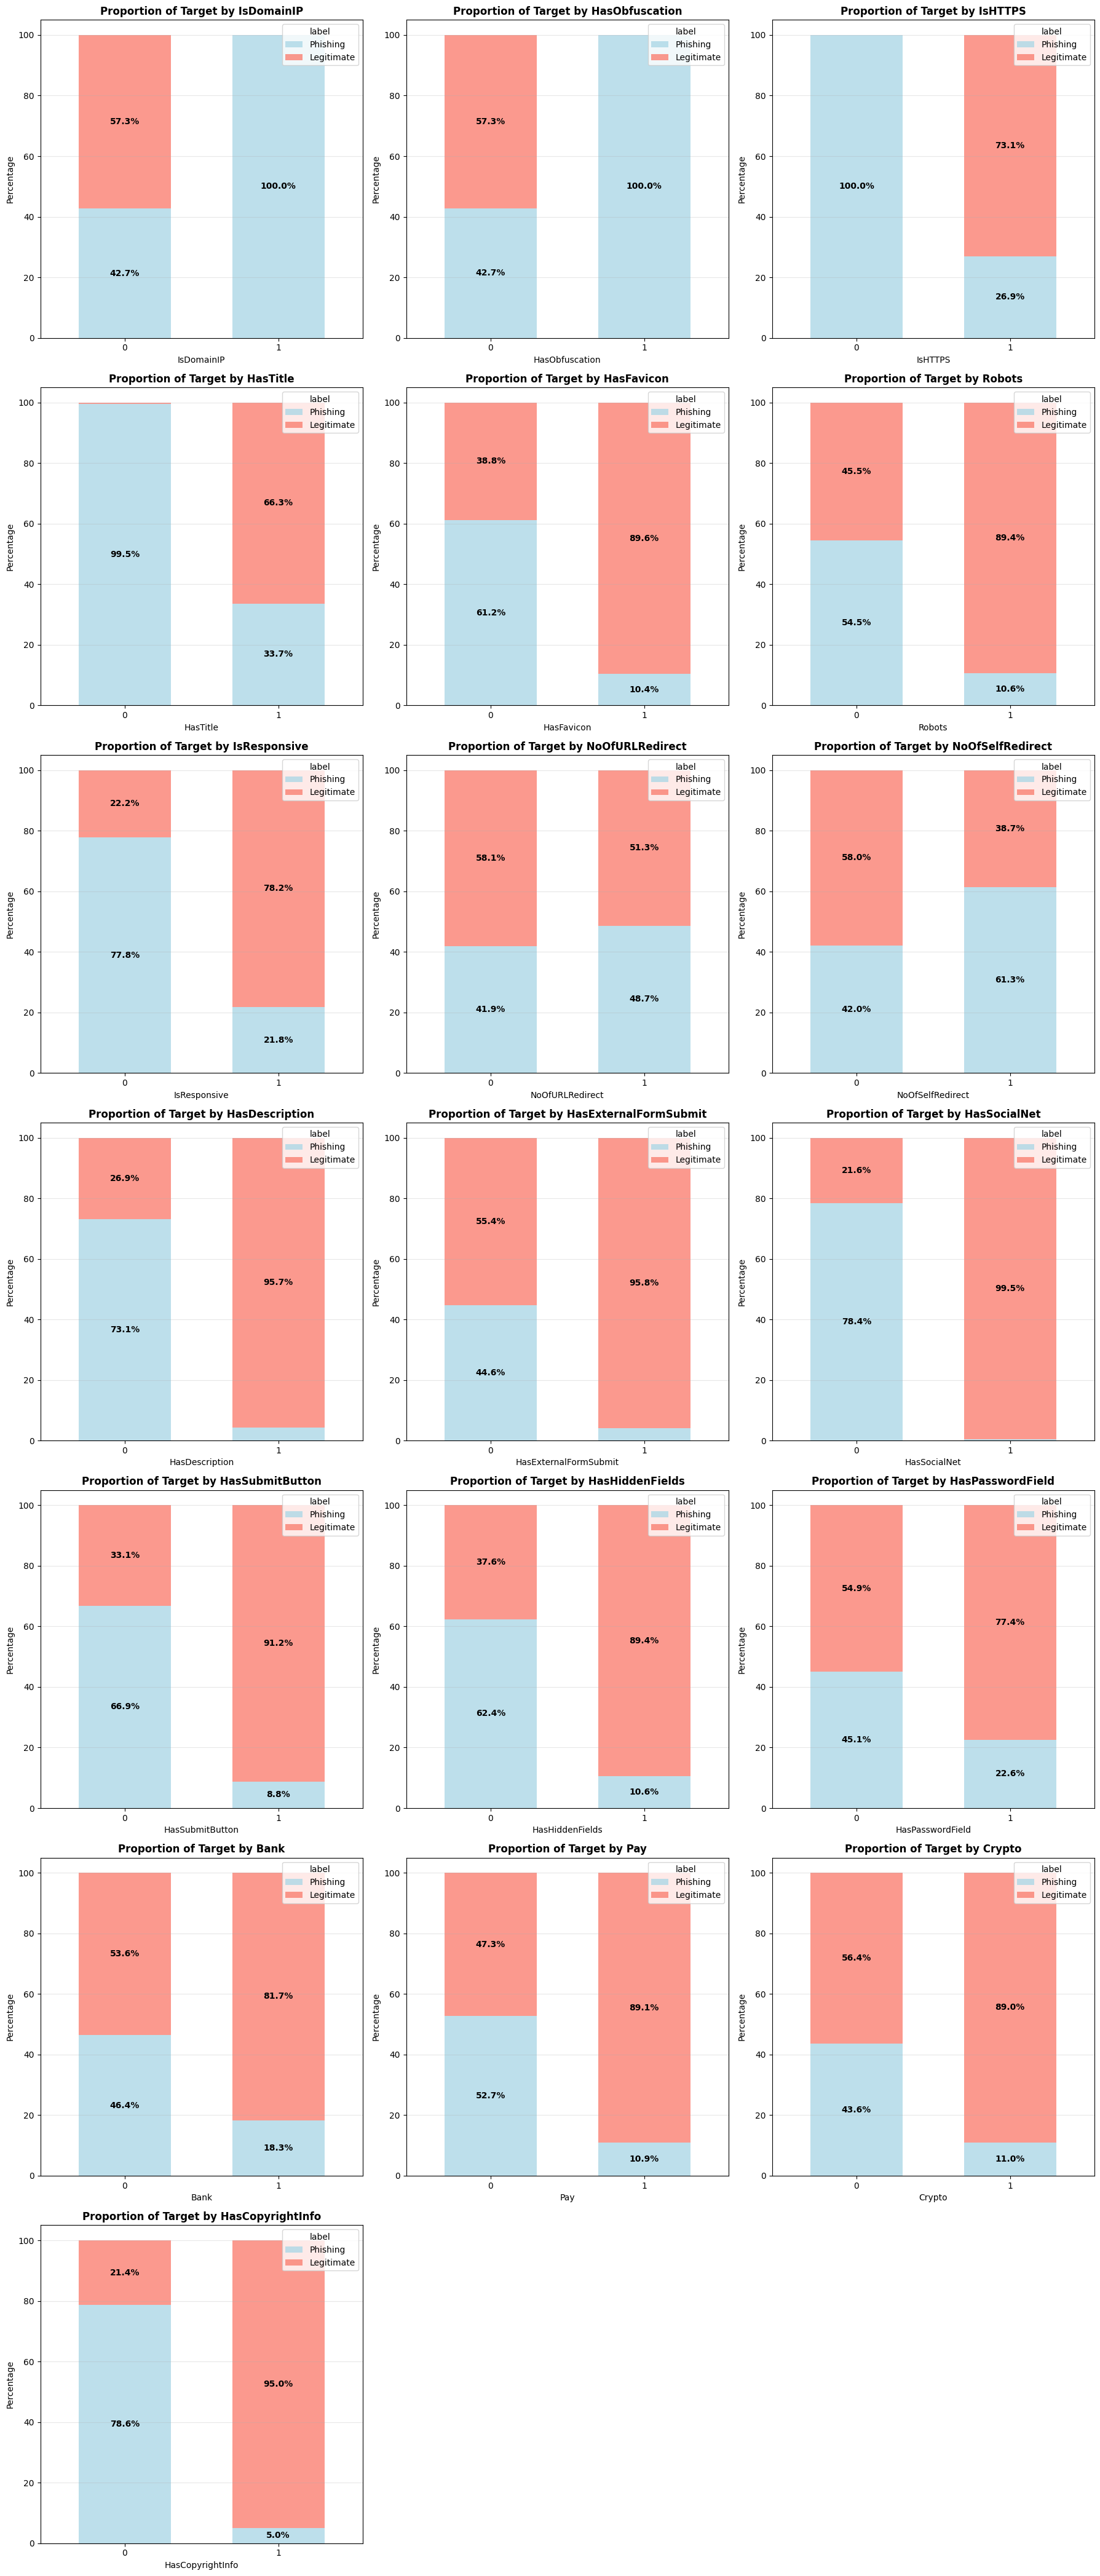


2. CROSS-TABULATION ANALYSIS
----------------------------------------

ISDOMAINIP vs LABEL:
COUNTS:
label            0       1   Total
IsDomainIP                        
0           100307  134850  235157
1              638       0     638
Total       100945  134850  235795

ROW PERCENTAGES (% within each IsDomainIP group):
label           0     1
IsDomainIP             
0            42.7  57.3
1           100.0   0.0

COLUMN PERCENTAGES (% within each label group):
label          0      1
IsDomainIP             
0           99.4  100.0
1            0.6    0.0

STATISTICAL TEST:
Chi-square statistic: 852.261
P-value: 0.000000
Significant: Yes
Cramér's V (effect size): 0.060


HASOBFUSCATION vs LABEL:
COUNTS:
label                0       1   Total
HasObfuscation                        
0               100460  134850  235310
1                  485       0     485
Total           100945  134850  235795

ROW PERCENTAGES (% within each HasObfuscation group):
label               0     1
Has

In [18]:
# Analysis of Binary Variables vs Target (Phishing Detection)
print("="*70)
print("BINARY VARIABLES VS TARGET ANALYSIS")
print("="*70)

# First, let's identify the target variable
target_col = 'label'

print(f"Using '{target_col}' as target variable")
print(f"Target distribution: {df[target_col].value_counts().to_dict()}")

# Remove target from binary_cols for analysis
analysis_cols = [col for col in binary_cols if col != target_col]

if len(analysis_cols) > 0 and target_col:
    # 1. BAR PLOTS - Proportion of phishing vs not phishing for each binary variable
    print(f"\n1. PROPORTIONAL BAR PLOTS")
    print("-" * 40)
    
    n_cols = min(3, len(analysis_cols))
    n_rows = (len(analysis_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))
    if n_rows == 1 and n_cols == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(analysis_cols):
        if i < len(axes):
            # Create cross-tabulation for proportions
            ct = pd.crosstab(df[col], df[target_col], normalize='index') * 100
            
            # Create stacked bar plot
            ct.plot(kind='bar', ax=axes[i], stacked=True, 
                   color=['lightblue', 'salmon'], alpha=0.8, width=0.6)
            axes[i].set_title(f'Proportion of Target by {col}', fontweight='bold', fontsize=12)
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Percentage')
            axes[i].legend(title=target_col, labels=['Phishing', 'Legitimate'])
            axes[i].tick_params(axis='x', rotation=0)
            axes[i].grid(True, alpha=0.3, axis='y')
            
            # Add percentage labels on bars
            for j, (idx, row) in enumerate(ct.iterrows()):
                cumulative = 0
                for k, value in enumerate(row):
                    if value > 5:  # Only show labels for segments > 5%
                        axes[i].text(j, cumulative + value/2, f'{value:.1f}%', 
                                   ha='center', va='center', fontweight='bold', fontsize=10)
                    cumulative += value
    
    # Hide empty subplots
    for i in range(len(analysis_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # 2. CROSS-TABULATIONS with counts and percentages
    print(f"\n2. CROSS-TABULATION ANALYSIS")
    print("-" * 40)
    
    for col in analysis_cols:
        print(f"\n{col.upper()} vs {target_col.upper()}:")
        print("=" * 50)
        
        # Cross-tabulation with counts
        ct_counts = pd.crosstab(df[col], df[target_col], margins=True, margins_name='Total')
        print("COUNTS:")
        print(ct_counts)
        
        # Cross-tabulation with row percentages (percentage within each group)
        ct_row_pct = pd.crosstab(df[col], df[target_col], normalize='index') * 100
        print(f"\nROW PERCENTAGES (% within each {col} group):")
        print(ct_row_pct.round(1))
        
        # Cross-tabulation with column percentages
        ct_col_pct = pd.crosstab(df[col], df[target_col], normalize='columns') * 100
        print(f"\nCOLUMN PERCENTAGES (% within each {target_col} group):")
        print(ct_col_pct.round(1))
        
        # Statistical significance test
        from scipy.stats import chi2_contingency
        chi2, p_value, dof, expected = chi2_contingency(ct_counts.iloc[:-1, :-1])  # Remove totals
        print(f"\nSTATISTICAL TEST:")
        print(f"Chi-square statistic: {chi2:.3f}")
        print(f"P-value: {p_value:.6f}")
        print(f"Significant: {'Yes' if p_value < 0.05 else 'No'}")
        
        # Effect size (Cramér's V)
        n = ct_counts.iloc[:-1, :-1].sum().sum()
        cramers_v = np.sqrt(chi2 / (n * min(ct_counts.shape[0]-2, ct_counts.shape[1]-2)))
        print(f"Cramér's V (effect size): {cramers_v:.3f}")
        
        print("\n" + "="*50)
    
    # 3. SUMMARY TABLE - Key statistics for all binary variables
    print(f"\n3. SUMMARY TABLE - ALL BINARY VARIABLES")
    print("-" * 50)
    
    summary_data = []
    for col in analysis_cols:
        ct = pd.crosstab(df[col], df[target_col])
        
        # Get counts for each combination
        count_00 = ct.loc[0, 0] if (0 in ct.index and 0 in ct.columns) else 0
        count_01 = ct.loc[0, 1] if (0 in ct.index and 1 in ct.columns) else 0
        count_10 = ct.loc[1, 0] if (1 in ct.index and 0 in ct.columns) else 0
        count_11 = ct.loc[1, 1] if (1 in ct.index and 1 in ct.columns) else 0
        
        # Calculate phishing rates
        phishing_rate_when_0 = count_01 / (count_00 + count_01) * 100 if (count_00 + count_01) > 0 else 0
        phishing_rate_when_1 = count_11 / (count_10 + count_11) * 100 if (count_10 + count_11) > 0 else 0
        
        # Chi-square test
        chi2, p_value, _, _ = chi2_contingency(ct)
        
        summary_data.append({
            'Variable': col,
            'Phishing_Rate_When_0': f"{phishing_rate_when_0:.1f}%",
            'Phishing_Rate_When_1': f"{phishing_rate_when_1:.1f}%",
            'Difference': f"{phishing_rate_when_1 - phishing_rate_when_0:.1f}pp",
            'Chi2_Stat': f"{chi2:.2f}",
            'P_Value': f"{p_value:.4f}",
            'Significant': 'Yes' if p_value < 0.05 else 'No'
        })
    
    summary_df = pd.DataFrame(summary_data)
    print(summary_df.to_string(index=False))
    
    # 4. TOP PREDICTIVE VARIABLES
    print(f"\n4. TOP PREDICTIVE BINARY VARIABLES")
    print("-" * 50)
    
    # Sort by absolute difference in phishing rates
    summary_df['Abs_Difference'] = summary_df['Difference'].str.replace('pp', '').astype(float).abs()
    top_vars = summary_df.nlargest(5, 'Abs_Difference')
    
    print("Top 5 variables by difference in phishing rates:")
    print(top_vars[['Variable', 'Phishing_Rate_When_0', 'Phishing_Rate_When_1', 'Difference']].to_string(index=False))
    
    # Variables that increase phishing risk
    risk_increasing = summary_df[summary_df['Difference'].str.replace('pp', '').astype(float) > 10]
    if not risk_increasing.empty:
        print(f"\nVariables that significantly INCREASE phishing risk (>10pp difference):")
        for _, row in risk_increasing.iterrows():
            print(f"  - {row['Variable']}: {row['Phishing_Rate_When_1']} vs {row['Phishing_Rate_When_0']}")
    
    # Variables that decrease phishing risk
    risk_decreasing = summary_df[summary_df['Difference'].str.replace('pp', '').astype(float) < -10]
    if not risk_decreasing.empty:
        print(f"\nVariables that significantly DECREASE phishing risk (>10pp difference):")
        for _, row in risk_decreasing.iterrows():
            print(f"  - {row['Variable']}: {row['Phishing_Rate_When_1']} vs {row['Phishing_Rate_When_0']}")

else:
    print("No binary variables found for analysis or target variable not identified.")

# Based on these insights, consider creating composite features:
df['Security_Score'] = (df['IsHTTPS'] + df['HasFavicon'] + df['HasTitle'] + 
                        df['HasDescription'] + df['HasCopyrightInfo']) / 5

df['Suspicious_Score'] = (df['IsDomainIP'] + df['HasObfuscation'] + 
                         (df['NoOfSelfRedirect'] > 0).astype(int)) / 3

df['Professional_Design'] = (df['IsResponsive'] + df['HasSocialNet'] + 
                            df['HasFavicon'] + df['Robots']) / 4

We can try to feature engineer these, because:
- highly correlated binary pairs
- handle extreme imbalance


How to handle the 100% of isHTTPS=0 (not HTTPS) is considered phishing? Isn't this not good for the model?
- need to verify data quality / feature engineering / regularisation